### CV发展脉络
- 2001年 机器学习主流核方法，理论漂亮
- 2000年 几何学解决CV问题，
- 特征工程尤其关键（SIFT SURF），然后视觉词袋，最后SVM
- 硬件发展
    - 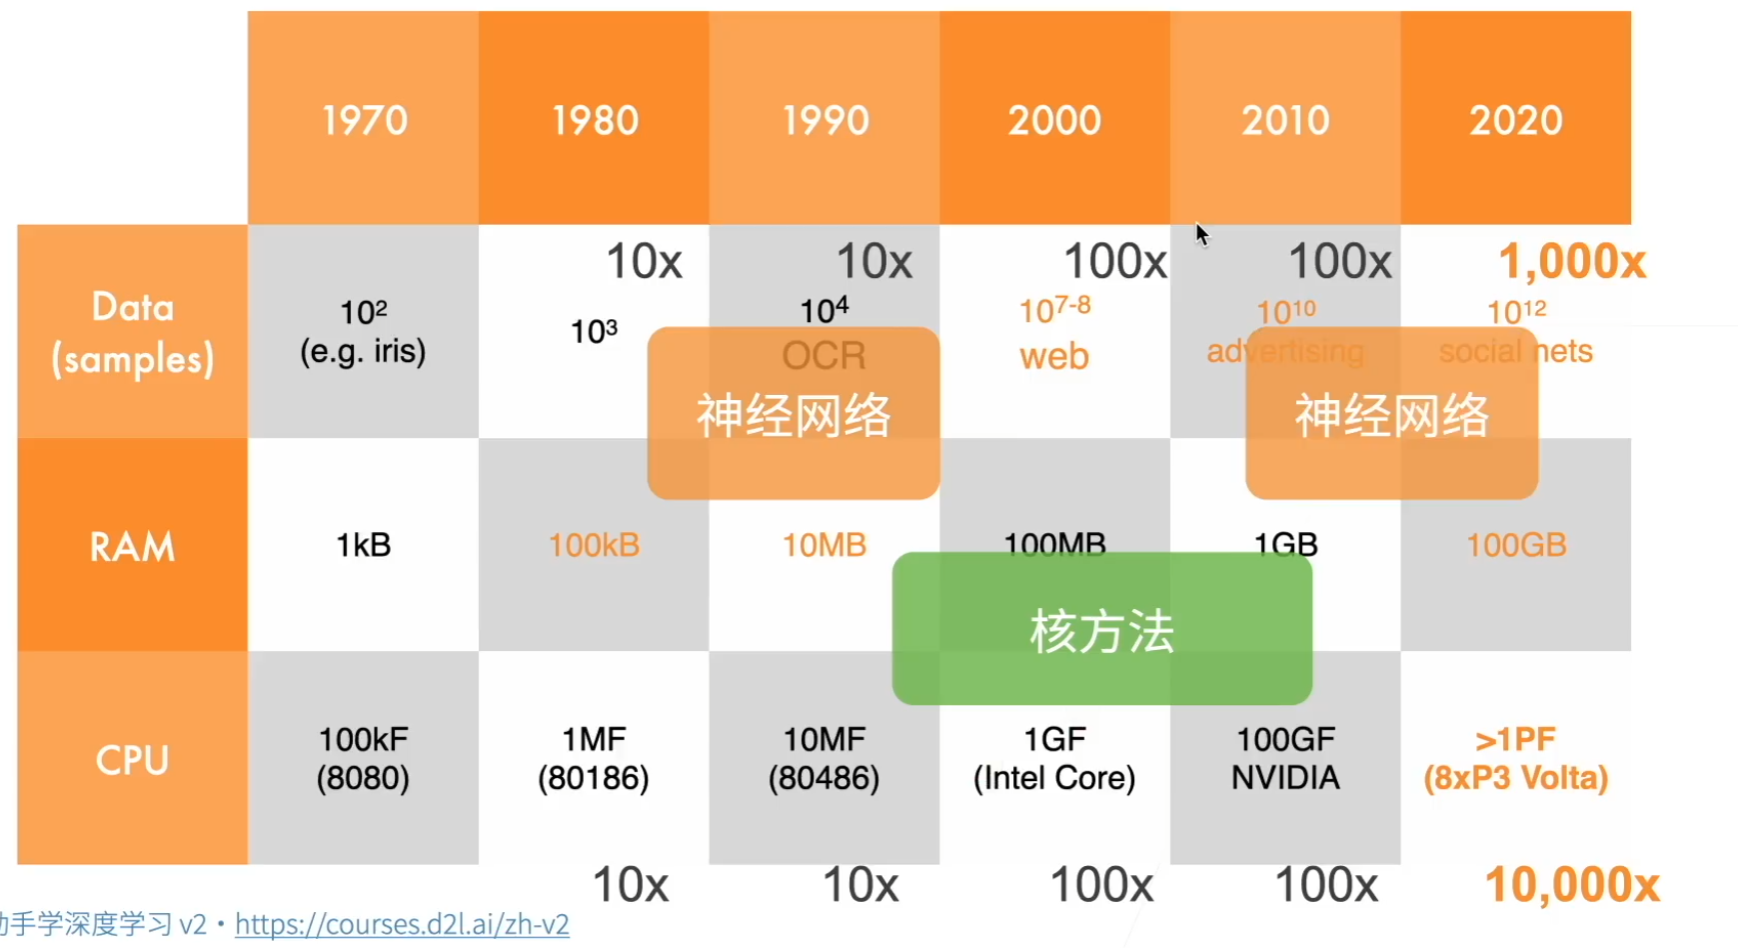
    
- ImageNet（2010）
     - 469*387
     - 1.2M 样本 
     - 1000类
- AlexNet
   - 赢得2012年ImageNet竞赛
   - 更深更大LeNet
   - 主要改进
       - 丢弃法
       - Relu
       - MaxPooling
   - 计算机视觉方法论的改变

- AlexNet架构
 - 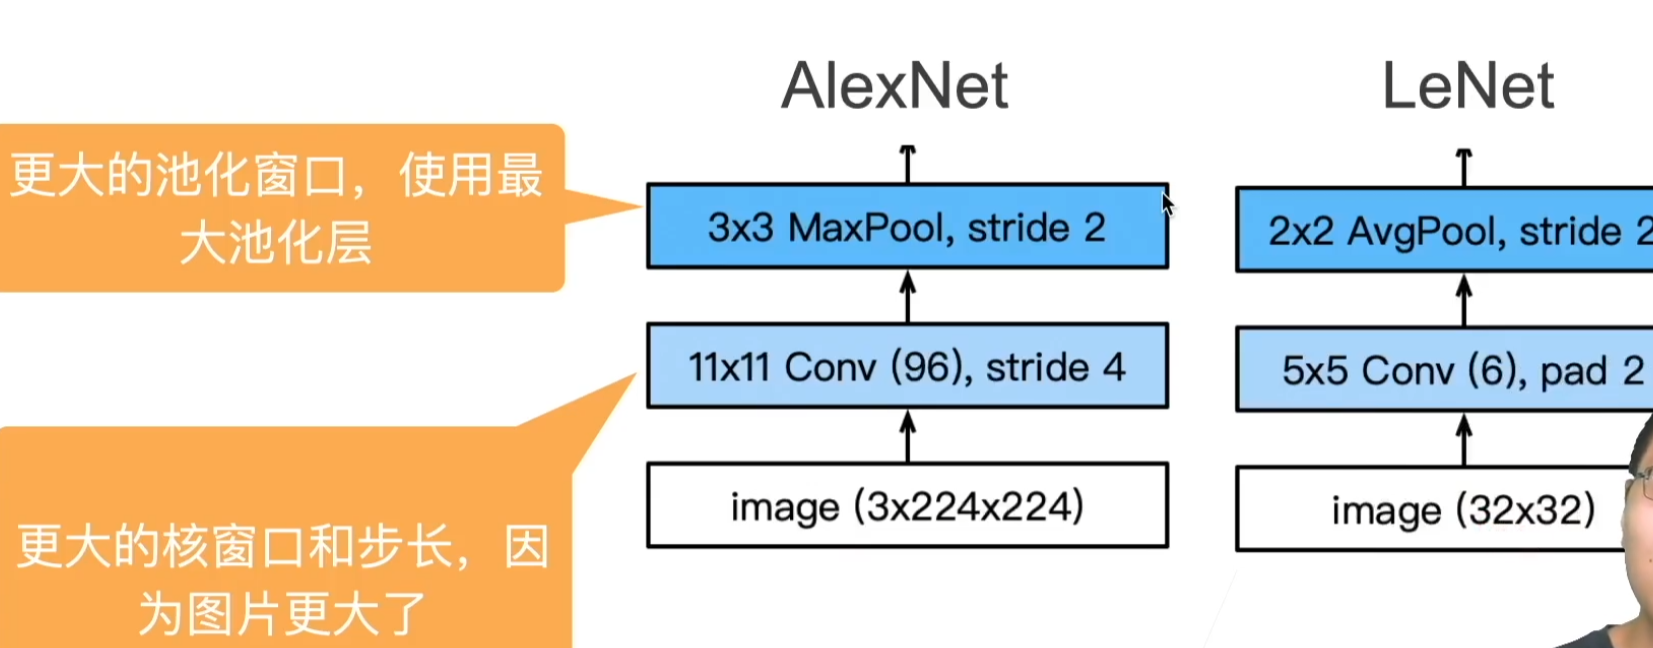
 - 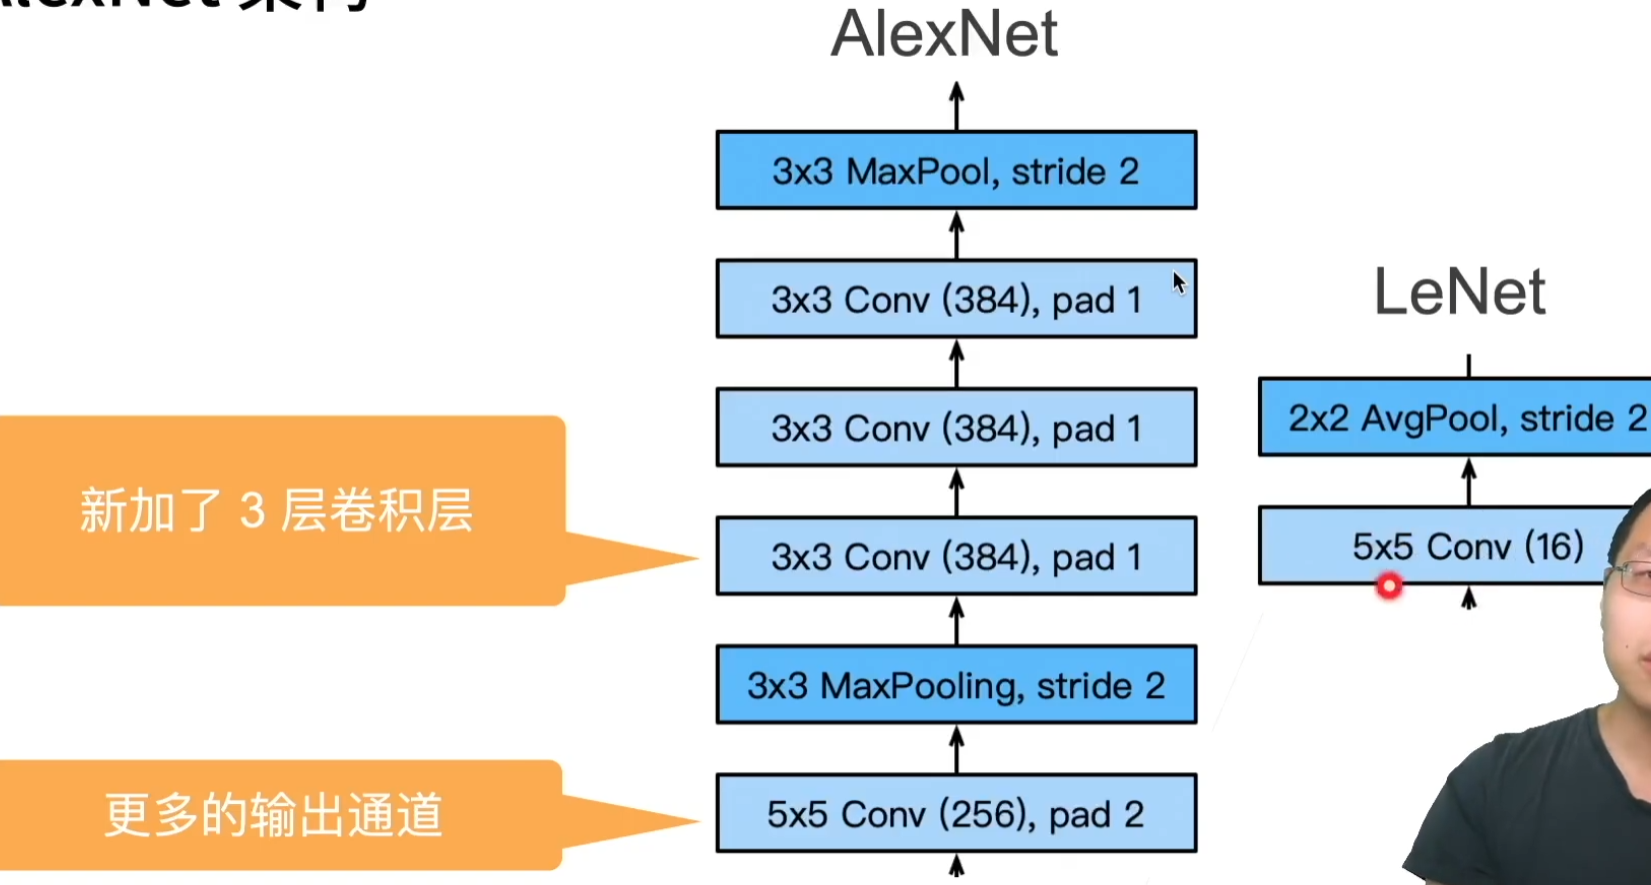
 - 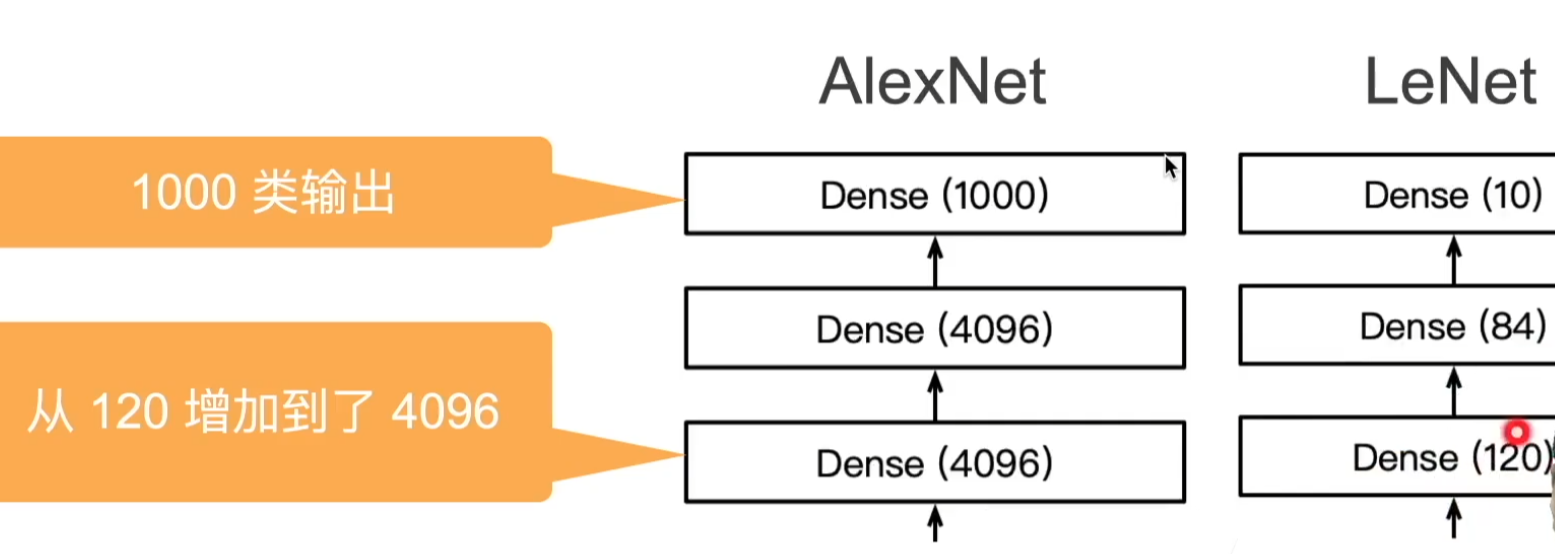
 - 更多细节
     - 激活函数sigmoid变为Relu
     - 隐藏全连接层后加入dropout
     - 数据增强
 - 复杂度
     - 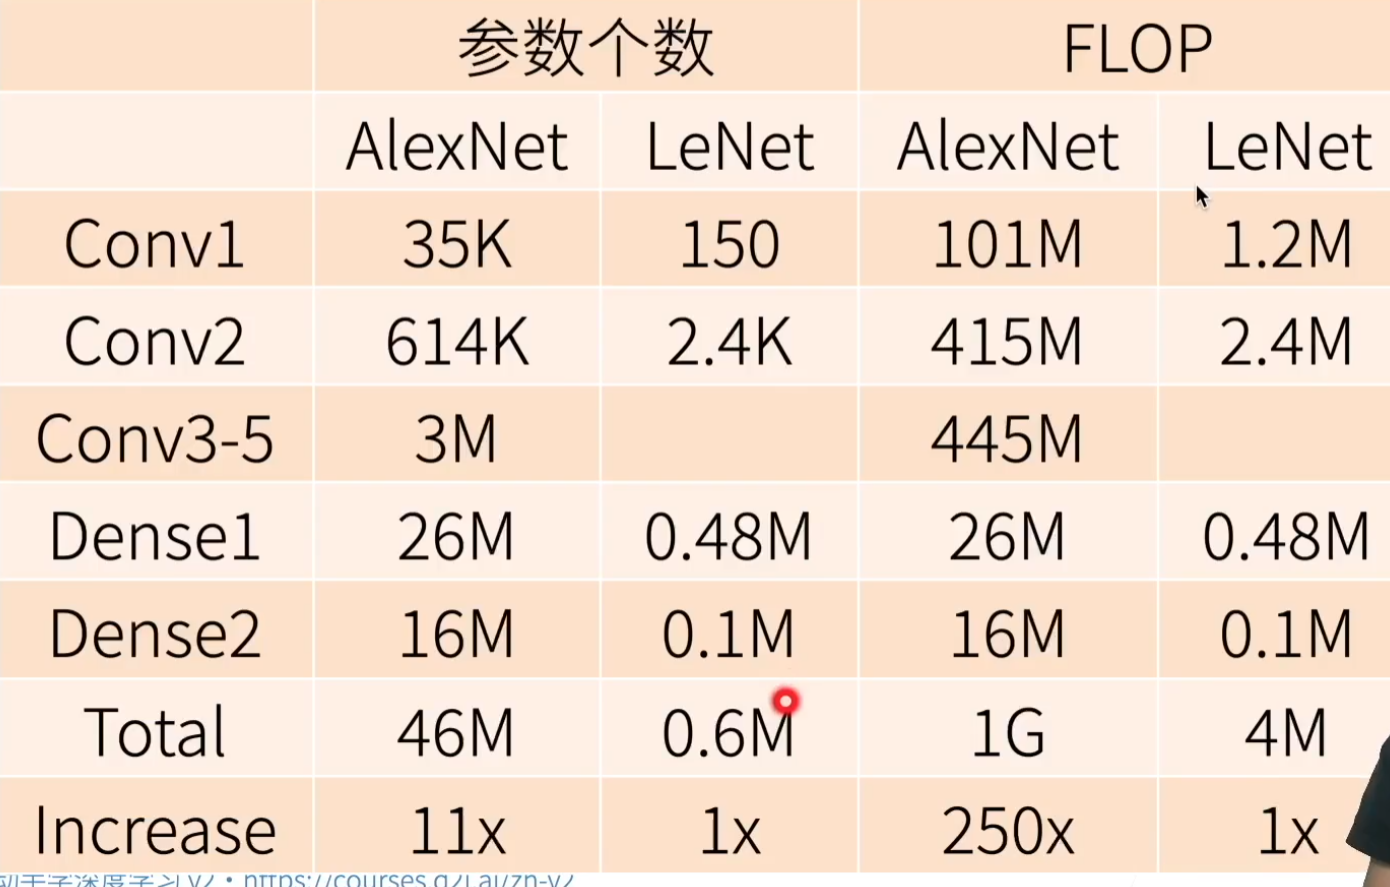
     
## 总结
- AlexNet 是更大、深的LeNet，10x参数个数，260x计算复杂度
- 新引入dropput，Relu，最大池化层、和数据增强
- 标志新一轮深度网络热潮开始

## 代码实现

In [3]:
import torch
from torch import nn
# from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5,  padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3,  padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3,  padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3,  padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(),
    nn.Linear(4096, 10)
    )

In [4]:
# 构造一个单通道数据，来观察每一层输出的shape

X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

In [5]:
# Fashion-MNIST 图像分辨率低于ImageNet图像，将其增加到224*224
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(
    batch_size, resize=224)

NameError: name 'd2l' is not defined

In [ ]:
# 训练AlexNet
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_g)

# QA
#### ImageNet是不是已经是历史了？
- 不，新方法还是会测
####  为什么AlexNet最后两个相同的全连接4096，一个可以吗？
- 1个还真不行，2个4096的dense算是很大的模型了，作者可能认为前面抽取的不够
#### AlexNet其中的local response normallization是什么？需要了解吗？
- 其中提到的normalization方法，后来被证实无效就没人用了，后面有更好的如BN,所以不用知道
#### 做了增强如几何+颜色变换后，反而效果没有只做几何的强？为什么？
- 正常，只是个超参数
#### 一般网络要求size固定，但是进来的图片不一定都是特定size的，此时resize会不会有问题？效果差？
- 一般把短边resize到256，长边先不管，然后从其中抠224*224来做预测，
- 当然也可以从短边的256中抠好几个出来做预测然后做ensemble，一般会保证高宽比然后从其中抠方的出来，不会直接resize到方的，效果不会多差

# 使用块网络 VGG
#### 能不能更深更大？
- 选项：更多全连接（更贵）、更多卷积层、将卷积层组成块，规则化

#### VGG块
- 深 vs 宽？
    - 5*5卷积比如更深3*3卷积
    - 深但窄的效果更好
- VGG块
    - 3*3 卷积（padding 1）（n层， m通道）
    - 2*2 最大池化层（stride 2）
    - 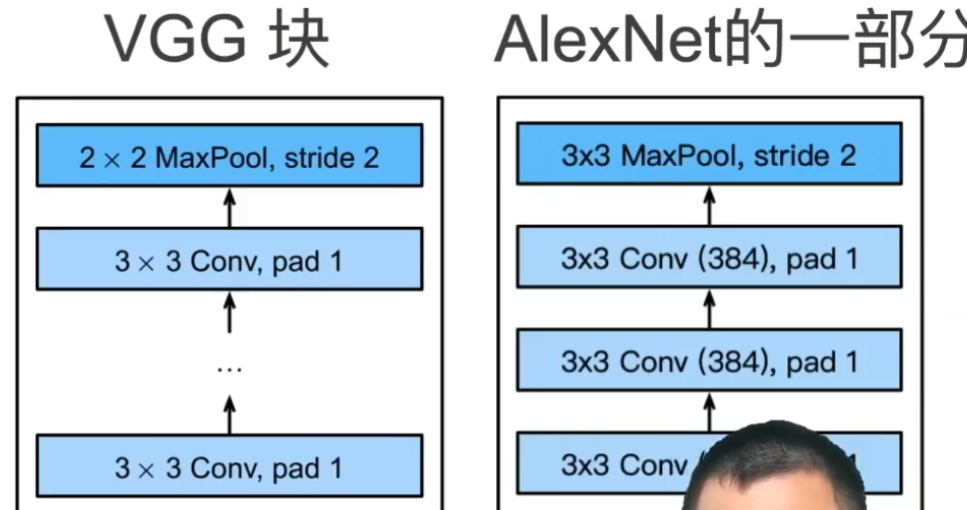
    
#### VGG 架构
- 多个VGG块后接全连接
- 不同次数的重复块得到的架构（VGG-16 VGG-19...,数字表示包含卷积、全连接但不含池化的层数）
- 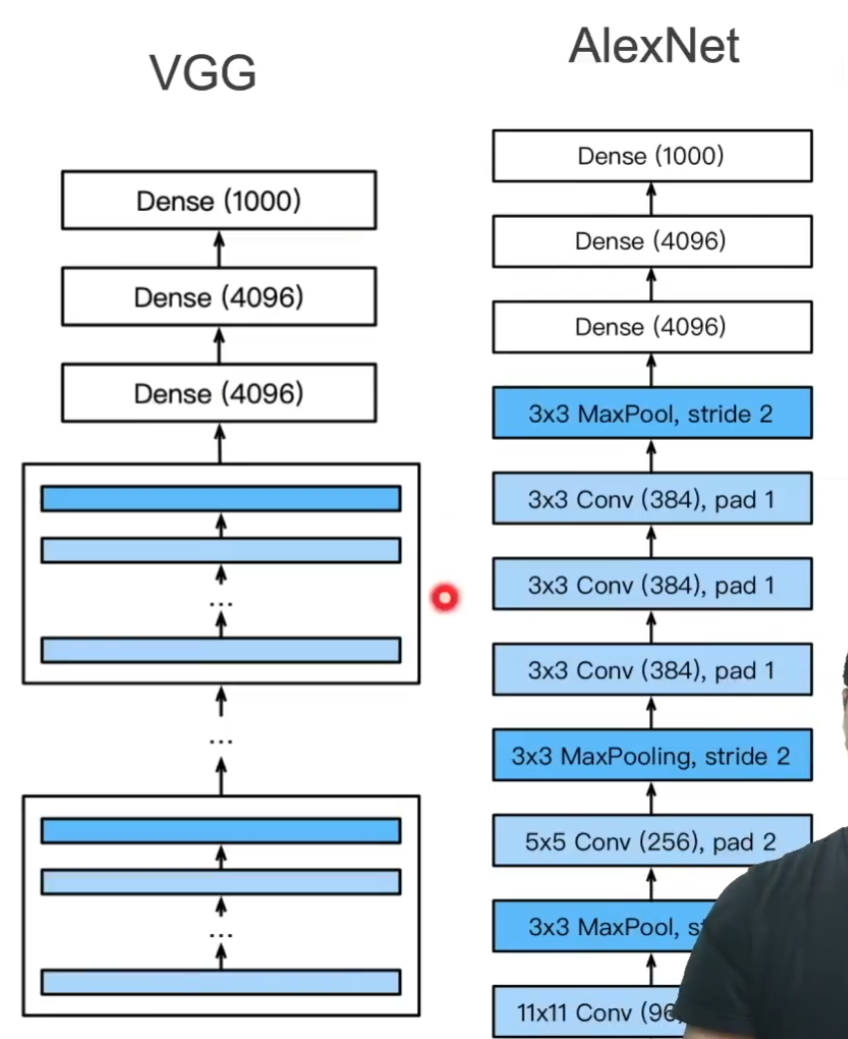

#### 进度
- Lenet（1995）
    - 2卷积 + 池化层
    - 2全连接
- AlexNet
    - 更大更深
    - ReLU Dropout，数据增强
- VGG
    - 更大更深的AlexNet（重复的VGG块）

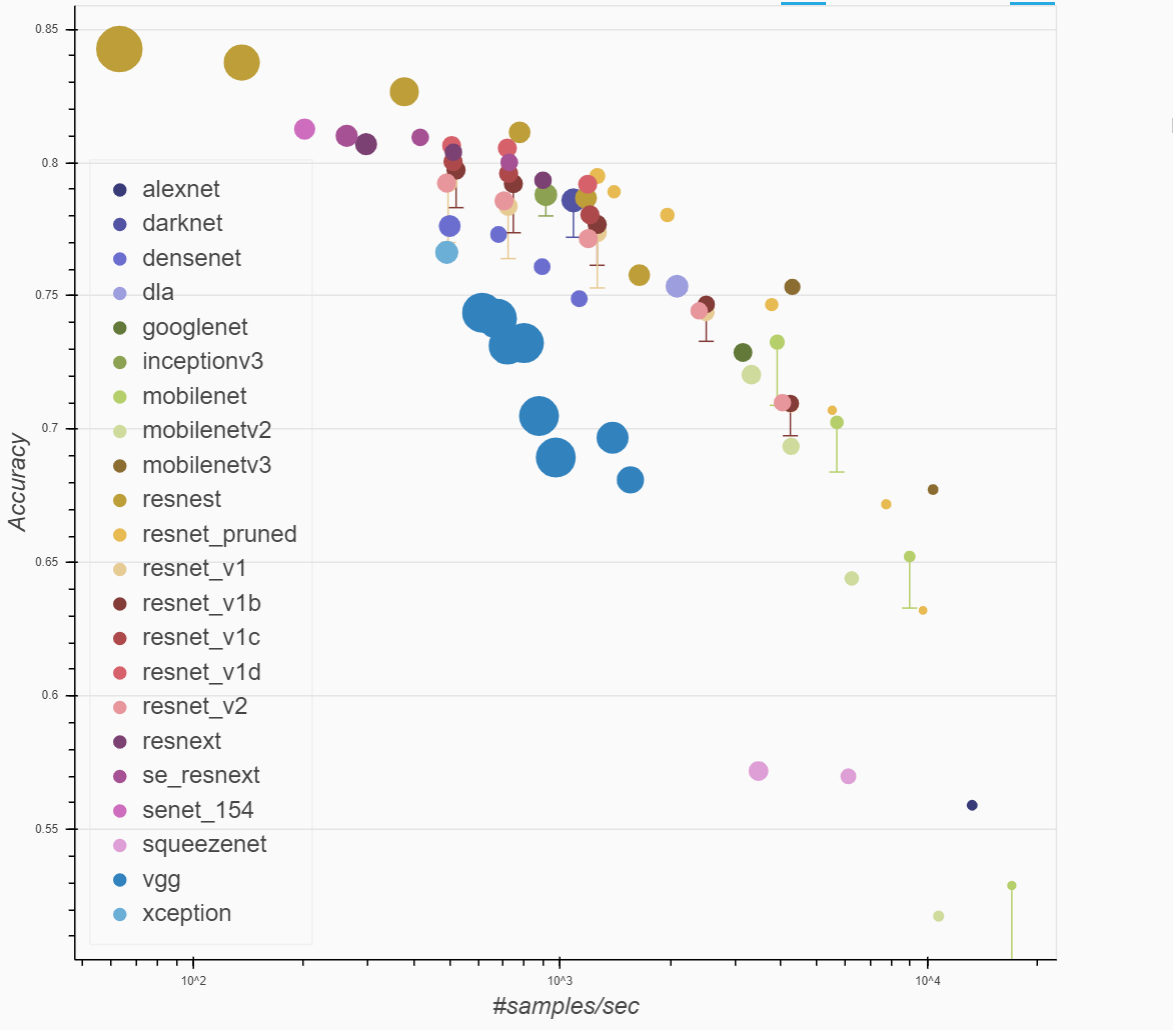

####
- VGG 使用可重复使用的卷积块来构建深度卷积神经网络
- 不同的卷积块个数和超参数可以得到不同复杂度的变种

# 代码

In [4]:
import torch
from torch import nn
from d2l import torch as d2l

# 这样每层经过块之后输入的图片尺寸都在缩小为1/2
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(
            in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [5]:
# 由于有maxpooling stride 2，所以每次块之后高宽减半
# 经典5块网络，可能由于224 5次之后只有7，质数除不了了
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512),(2, 512))

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(
            num_convs, in_channels, out_channels))
        in_channels = out_channels
        
    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(),
        nn.Dropout(0.5), nn.Linear(4096, 4096), nn.ReLU(),
        nn.Dropout(0.5), nn.Linear(4096, 10))

net = vgg(conv_arch)

In [6]:
# 观察每层输出的大小
# 经典设计：高宽减半，通道加倍，之后设计模式经常使用
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:\t', X.shape)
    

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


loss 0.177, train acc 0.935, test acc 0.924
818.6 examples/sec on cuda


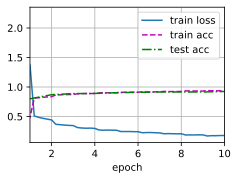

In [9]:
# 由于VGG-11比AlexNet计算量更大， 因此构建一个通道数较少的网络
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

# 模型训练
lr, num_epochs, batch_size = 0.05, 10, 128

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, device="cuda")

# QA
#### 需要学习特征值特征向量和奇异值分解的知识嘛？
- 本门课用的不多，但是有些工作用到其思想，想学可以学的
#### 训练loss一直降，test loss一开始就不降？
- 两点，测试代码写错，或者开始就overfitting（两个数据集完全不一样）
#### 尽量用简单的模型，不要过度设计，以便复用